# 0. Install and Import Dependencies


In [1]:
!pip install easyocr
!pip install imutils

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1.Read in Image , GrayScale and Blur


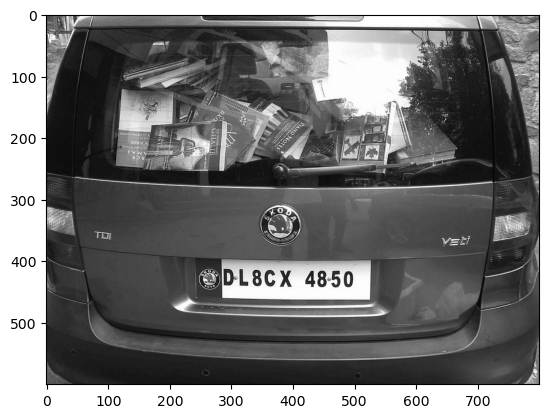

In [3]:
img = cv2.imread('img001.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2.Apply Filter and find edges for localization


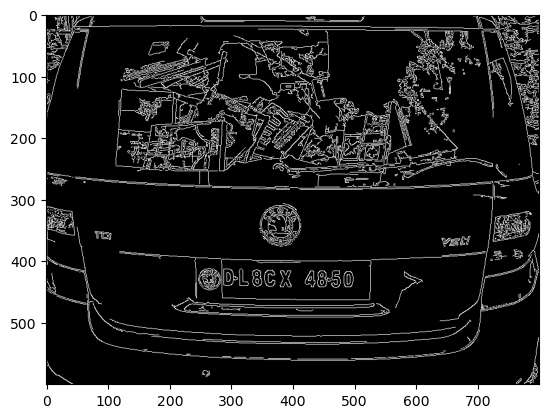

In [4]:
gray = cv2.bilateralFilter(gray, 11, 17, 17) #Noise Reduction
#cv2.imshow("2 - Bilateral Filter", gray)

edged = cv2.Canny(gray, 30, 200)#Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask


In [5]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours =sorted(contours , key = cv2.contourArea, reverse = True)[:10] 


In [6]:
NumberPlateCnt = None 

#count = 0
for contour in contours:
        
        approx = cv2.approxPolyDP(contour , 10 , True)
        if len(approx) == 4:  
            NumberPlateCnt = approx 
            break

In [7]:
NumberPlateCnt

array([[[284, 399]],

       [[286, 460]],

       [[525, 462]],

       [[526, 399]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[NumberPlateCnt],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

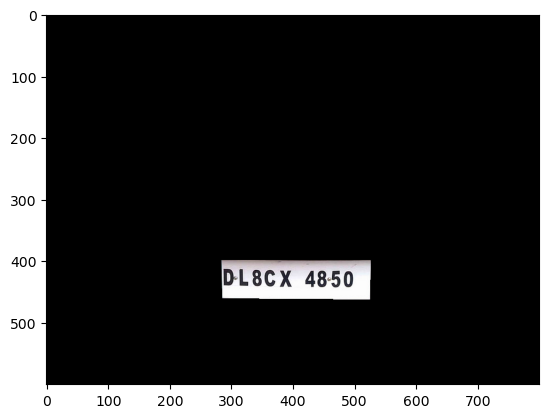

In [9]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image =gray[x1:x2+1,y1:y2+1]

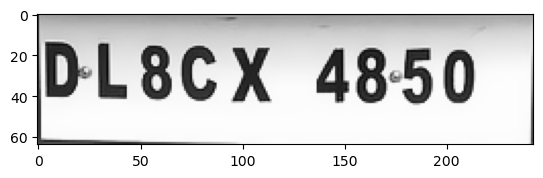

In [11]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text


In [12]:
reader =easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 7], [221, 7], [221, 51], [0, 51]], 'DL8CX 4850', 0.7960128947454337)]

#  5. Render Result


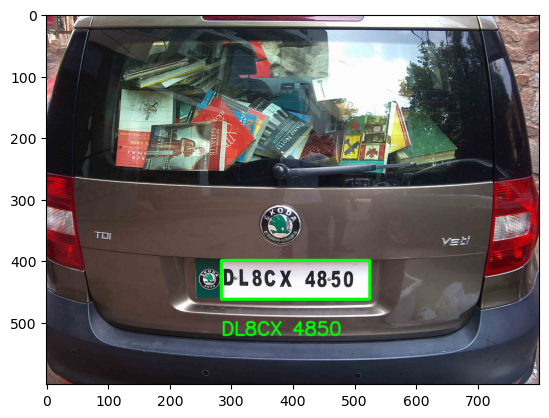

In [13]:
text =result [0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img , text=text , org =(approx[0][0][0],approx[1][0][1]+60) , fontFace=font , fontScale=1 , color=(0,255,0) , thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img , tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))

#  6. Car Belonging State

In [14]:
States={"AN":"ANDAMAN AND NICOBAR","AP": "Andhra Pradesh",
"AR": "Arunachal Pradesh",
"AS": "Assam",
"BR": "Bihar",
"CH": "Chandigarh",
"CT": "Chhattisgarh",
"DN": "Dadra and Nagar Haveli and Daman and Diu",
"DL": "Delhi",
"GA": "Goa",
"GJ": "Gujarat",
"HR": "Haryana",
"HP": "Himachal Pradesh",
"JH": "Jharkhand",
"KA": "Karnataka",
"KL": "Kerala",
"LA": "Lakshadweep",
"MP": "Madhya Pradesh",
"MH": "Maharashtra",
"MN": "Manipur",
"ML": "Meghalaya",
"MZ": "Mizoram",
"NL": "Nagaland",
"OD": "Odisha",
"PB": "Punjab",
"PY": "Puducherry",
"RJ": "Rajasthan",
"SK": "Sikkim",
"TN": "Tamil Nadu",
"TG": "Telangana",
"TR": "Tripura",
"UP": "Uttar Pradesh",
"UK": "Uttarakhand",
"WB": "West Bengal"}
text=result[0][-2]
stat=text[0:2]

try:
    print('Car Belongs to',States[stat],'state')
    
except:
    print('State not recognised')
print (text)    

Car Belongs to Delhi state
DL8CX 4850
